In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import re

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
ls ../data

2013_-_Global_500_Emissions_and_Response_Status.csv
2017-cdp-scores.csv
board_data.csv
ghgp_data_by_year_8_5_17.xlsx*
tickers.csv
tickers.xlsx*


In [3]:
board_data = pd.read_csv('../data/board_data.csv')
us_emissions = pd.read_csv('../data/2017-cdp-scores.csv')

In [4]:
board_data.head()

,Unnamed: 0,Company,2020 Rating,Total Board,# of women,% of Women,Sector,State,City,Company_clean
0,0,3M CO,NaN,11,2,18%,Industrials,Minnesota,ST. PAUL,3m
1,1,ABBOTT LABORATORIES,NaN,12,4,33%,Healthcare,Illinois,ABBOTT PARK,abbott laboratories
2,2,ADOBE SYSTEMS INC,NaN,10,2,20%,Technology,California,SAN JOSE,adobe systems
3,3,AFLAC INC,NaN,14,3,21%,Financial Services,Georgia,COLUMBUS,aflac
4,4,AIR PRODUCTS & CHEMICALS INC /DE/,NaN,8,2,25%,Basic Materials,Pennsylvania,ALLENTOWN,air products chemicals


In [5]:
us_emissions.head()

,Company,Country,Sector,Climate score,Water Score,Timber score,Palm oil score,Cattle production score,Soy score
0,Skechers U.S.A. Inc,USA,Consumer Discretionary,Not requested,Not requested,Not scored,Not scored,Not scored,Not scored
1,Skywest Inc,USA,Industrials,F,Not requested,Not requested,Not requested,Not requested,Not requested
2,"Skyworks Solutions, Inc.",USA,Information Technology,F,F,Not requested,Not requested,Not requested,Not requested
3,SL Green Realty Corp.,USA,Financials,F,Not requested,Not requested,Not requested,Not requested,Not requested
4,SM Energy Co.,USA,Energy,F,Not requested,Not requested,Not requested,Not requested,Not requested


In [6]:
us_emissions['Company_clean'] = us_emissions['Company'].str.lower()
us_emissions['Company_clean'] = us_emissions['Company_clean'].str.replace(" /de/", "")
us_emissions['Company_clean'] = us_emissions['Company_clean'].str.replace('[^\w\s]','')
us_emissions['Company_clean'] = us_emissions['Company_clean'].str.replace(" corporation", "")
us_emissions['Company_clean'] = us_emissions['Company_clean'].str.replace(" inc", "")
us_emissions['Company_clean'] = us_emissions['Company_clean'].str.replace(" inc.", "")
us_emissions['Company_clean'] = us_emissions['Company_clean'].str.replace(" corp", "")
us_emissions['Company_clean'] = us_emissions['Company_clean'].str.replace(" ltd", "")
us_emissions['Company_clean'] = us_emissions['Company_clean'].str.replace(" co", "")
joined_df = pd.merge(us_emissions, board_data, on='Company_clean')

In [7]:
joined_df.head()

,Company_x,Country,Sector,Climate score,Water Score,Timber score,Palm oil score,Cattle production score,Soy score,Company_clean,Unnamed: 0,Company_y,2020 Rating,Total Board,# of women,% of Women,Sector,State,City
0,Skechers U.S.A. Inc,USA,Consumer Discretionary,Not requested,Not requested,Not scored,Not scored,Not scored,Not scored,skechers usa,618,SKECHERS USA INC,NaN,9,0,0%,Consumer Cyclical,California,MANHATTAN BEACH
1,Skywest Inc,USA,Industrials,F,Not requested,Not requested,Not requested,Not requested,Not requested,skywest,619,SKYWEST INC,NaN,10,1,10%,Industrials,Utah,ST. GEORGE
2,"Skyworks Solutions, Inc.",USA,Information Technology,F,F,Not requested,Not requested,Not requested,Not requested,skyworks solutions,620,SKYWORKS SOLUTIONS INC.,NaN,9,1,11%,Technology,Massachusetts,WOBURN
3,SL Green Realty Corp.,USA,Financials,F,Not requested,Not requested,Not requested,Not requested,Not requested,sl green realty,621,SL GREEN REALTY CORP,NaN,9,2,22%,Real Estate,New York,NEW YORK
4,SM Energy Co.,USA,Energy,F,Not requested,Not requested,Not requested,Not requested,Not requested,sm energy,623,SM Energy Co,NaN,8,1,13%,Energy,Colorado,DENVER


In [8]:
joined_df = joined_df.sort_values(by='% of Women', ascending=True)

In [9]:
joined_df['% of Women'] = joined_df['% of Women'].apply(lambda x : int(re.sub('%', '', x)))

In [10]:
joined_df.head()

,Company_x,Country,Sector,Climate score,Water Score,Timber score,Palm oil score,Cattle production score,Soy score,Company_clean,Unnamed: 0,Company_y,2020 Rating,Total Board,# of women,% of Women,Sector,State,City
0,Skechers U.S.A. Inc,USA,Consumer Discretionary,Not requested,Not requested,Not scored,Not scored,Not scored,Not scored,skechers usa,618,SKECHERS USA INC,NaN,9,0,0,Consumer Cyclical,California,MANHATTAN BEACH
28,SunCoke Energy Inc,USA,Materials,F,Not requested,Not requested,Not requested,Not requested,Not requested,suncoke energy,725,SunCoke Energy Inc.,NaN,7,0,0,Basic Materials,Illinois,LISLE
446,Olympic Steel Inc,USA,Materials,F,Not requested,Not requested,Not requested,Not requested,Not requested,olympic steel,145,OLYMPIC STEEL INC,NaN,8,0,0,NaN,NaN,BEDFORD HEIGHTS
495,Puma Biotechnology Inc,USA,Health Care,F,Not requested,Not requested,Not requested,Not requested,Not requested,puma biotechnology,373,PUMA BIOTECHNOLOGY INC.,NaN,5,0,0,Healthcare,California,LOS ANGELES
450,Ormat Technologies Inc,USA,Utilities,D,Not requested,Not requested,Not requested,Not requested,Not requested,ormat technologies,178,ORMAT TECHNOLOGIES INC.,NaN,8,0,0,NaN,NaN,RENO


In [11]:
joined_df.columns

Index(['Company_x', ' Country', ' Sector', ' Climate score', ' Water Score',
       ' Timber score', ' Palm oil score', ' Cattle production score',
       ' Soy score', 'Company_clean', 'Unnamed: 0', 'Company_y', '2020 Rating',
       'Total Board', '# of women', '% of Women', 'Sector', 'State', 'City'],
      dtype='object')

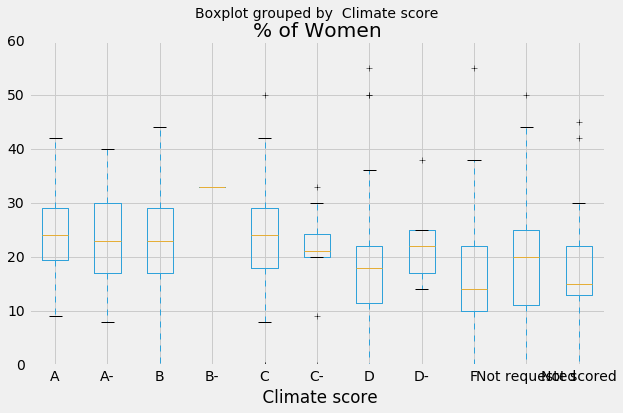

In [12]:
f, ax = plt.subplots()
joined_df.boxplot(column='% of Women', by=' Climate score', ax=ax);

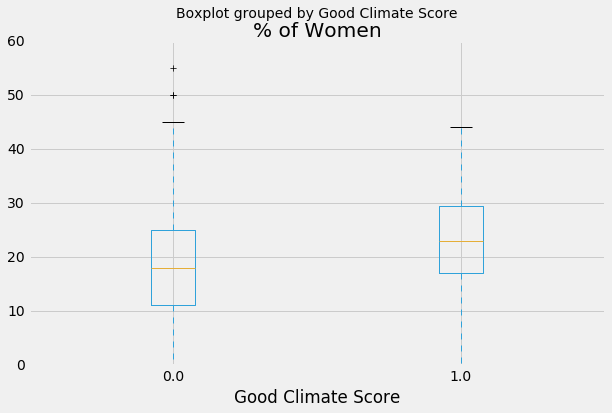

In [14]:
tmp = pd.get_dummies(joined_df[' Climate score'])
joined_df['Good Climate Score'] = tmp['A']+tmp['A-']+tmp['B']+tmp['B-']
f, ax = plt.subplots()
joined_df.boxplot(column='% of Women', by='Good Climate Score', ax=ax);

In [15]:
print("Mean % of women, for companies with good climate scores: " + 
      str(round(np.mean(joined_df['% of Women'][joined_df['Good Climate Score']==1]), 2)) + "%")
print("Mean % of women, for companies with low climate scores: " + 
      str(round(np.mean(joined_df['% of Women'][joined_df['Good Climate Score']==0]), 2)) + "%")

Mean % of women, for companies with good climate scores: 23.14%
Mean % of women, for companies with low climate scores: 18.6%


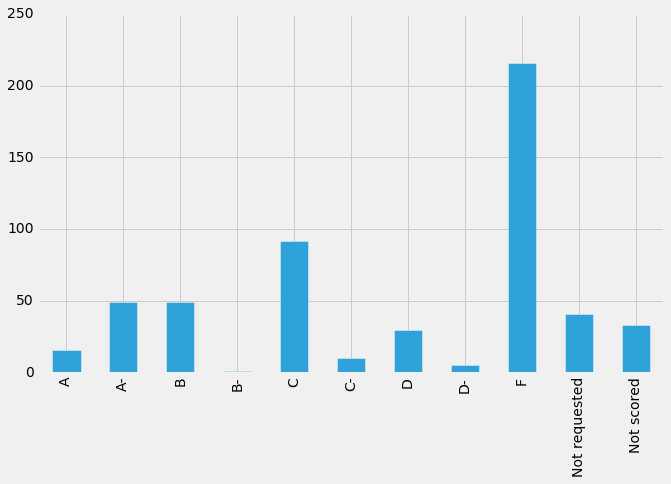

In [27]:
f, ax = plt.subplots()
tab = joined_df[' Climate score'].value_counts()
tab = tab.sort_index()
tab.plot(kind='bar')
#tab['A', 'A-', 'B', 'B-', 'C', 'C-', 'D', 'F', 'Not requested', 'Not scored']

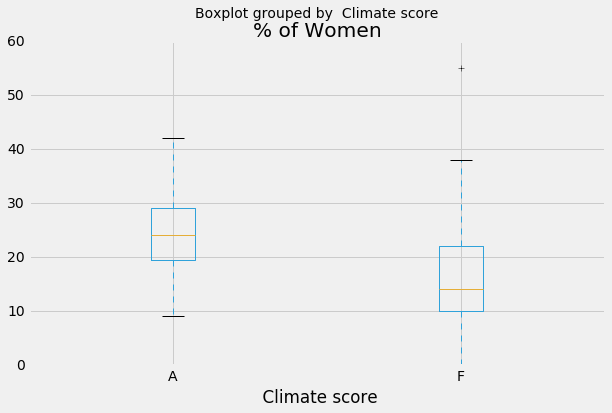

In [20]:
f, ax = plt.subplots()
#joined_df.ix[].boxplot(column='% of Women', by=' Climate score', ax=ax);
climatea = joined_df[' Climate score'] == 'A' 
climatef = joined_df[' Climate score'] == 'F'
joined_df[climatea | climatef].boxplot(column='% of Women', by=' Climate score', ax=ax)

In [19]:
print("Mean % of women, for companies with A climate scores: " + 
      str(round(np.mean(joined_df['% of Women'][joined_df[' Climate score']=='A']), 2)) + "%")
print("Mean % of women, for companies with F climate scores: " + 
      str(round(np.mean(joined_df['% of Women'][joined_df[' Climate score']=='F']), 2)) + "%")

Mean % of women, for companies with A climate scores: 24.75%
Mean % of women, for companies with F climate scores: 16.12%
